In [7]:
import pandas as pd
df = pd.read_csv('Students Social Media Addiction.csv') 
df

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
0,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,1,4
1,9,18,Male,High School,Japan,4.0,TikTok,No,6.5,7,1,5
2,14,18,Female,High School,Mexico,6.5,Instagram,Yes,5.5,5,4,9
3,21,18,Male,High School,Belgium,5.3,TikTok,Yes,5.5,5,4,8
4,33,18,Male,High School,Indonesia,5.4,TikTok,Yes,5.4,5,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...
700,680,24,Male,Graduate,Mexico,6.2,Facebook,Yes,6.3,5,4,8
701,686,24,Male,Graduate,China,5.5,WeChat,Yes,6.8,6,3,7
702,692,24,Male,Graduate,Ireland,5.9,Instagram,Yes,6.5,6,3,7
703,698,24,Male,Graduate,France,4.8,Facebook,No,7.1,7,2,5


In [8]:
def Desc_stat(ds, var): 
    mean = ds[var].mean() 
    median = ds[var].median() 
    mode = ds[var].mode()[0] if not ds[var].mode().empty else None
    minimum = ds[var].min() 
    maximum = ds[var].max() 
    value_range = maximum - minimum
    std_dev = ds[var].std() 
    variance = ds[var].var() 
    skew = ds[var].skew() 
    kurtosis = ds[var].kurt() 
    count = ds[var].count() 
    quart = [ 
         ds[var].quantile(0),    
        ds[var].quantile(0.25), 
        ds[var].quantile(0.50), 
        ds[var].quantile(0.75), 
        ds[var].quantile(1), 
        ds[var].quantile(0.75) - ds[var].quantile(0.25) 
    ] 
    summary = { 
        "Mean": mean, 
        "Median": median, 
        "Mode": mode, 
        "Minimum": minimum, 
        "Maximum": maximum, 
        "Range": value_range, 
        "Std Dev": std_dev, 
        "Variance": variance, 
        "Skewness": skew, 
        "Kurtosis": kurtosis, 
        "0th Percentile": quart[0], 
        "25th Percentile": quart[1], 
        "50th Percentile": quart[2], 
        "75th Percentile": quart[3], 
        "100th Percentile": quart[4], 
        "Interquartile Range": quart[5], 
        "Count": count
    } 
    return summary

In [9]:
print(df["Gender"].value_counts())

# Stratified sampling: equal numbers from each gender
male_sample = df[df["Gender"] == "Male"].sample(n=75, random_state=42)
female_sample = df[df["Gender"] == "Female"].sample(n=75, random_state=42)

# Combine both groups
stratified_sample = pd.concat([male_sample, female_sample])

# Check new sample
print("Stratified sample size:", len(stratified_sample))
print(stratified_sample["Gender"].value_counts())

# Apply your descriptive function (already created above)
desc_result = Desc_stat(stratified_sample, 'Addicted_Score')

# Show results
print("Descriptive Statistics for Stratified Sample:")
for key, value in desc_result.items():
    print(f"{key}: {value}")

Gender
Female    353
Male      352
Name: count, dtype: int64
Stratified sample size: 150
Gender
Male      75
Female    75
Name: count, dtype: int64
Descriptive Statistics for Stratified Sample:
Mean: 6.453333333333333
Median: 7.0
Mode: 7
Minimum: 3
Maximum: 9
Range: 6
Std Dev: 1.582567223109324
Variance: 2.504519015659957
Skewness: -0.3457891210515039
Kurtosis: -0.9060524138863943
0th Percentile: 3.0
25th Percentile: 5.0
50th Percentile: 7.0
75th Percentile: 8.0
100th Percentile: 9.0
Interquartile Range: 3.0
Count: 150


In [10]:
#Systematic Sampling – select every 5th record
sample = df.iloc[::5]

print("Systematic sample size:", len(sample))

# Step 3: Apply your descriptive function (already created)
desc_result = Desc_stat(sample, 'Addicted_Score')

# Step 4: Print results
print("Descriptive Statistics for Systematic Sample (Dependent Variable: Addicted_Score):")
for key, value in desc_result.items():
    print(f"{key}: {value}")

Systematic sample size: 141
Descriptive Statistics for Systematic Sample (Dependent Variable: Addicted_Score):
Mean: 6.2695035460992905
Median: 7.0
Mode: 7
Minimum: 2
Maximum: 9
Range: 7
Std Dev: 1.6469861332754516
Variance: 2.712563323201624
Skewness: -0.3532340322031284
Kurtosis: -0.8376456060071829
0th Percentile: 2.0
25th Percentile: 5.0
50th Percentile: 7.0
75th Percentile: 8.0
100th Percentile: 9.0
Interquartile Range: 3.0
Count: 141


In [11]:
#Q5
import pandas as pd

 
# Descriptive Statistics Report
# ===============================
desc_result = Desc_stat(stratified_sample, 'Addicted_Score')

print("\n" + "="*70)
print("DESCRIPTIVE STATISTICS REPORT")
print("="*70)
print(f"Dependent Variable: Addicted_Score")
print(f"Dataset: Stratified Sample (Equal Males & Females)\n")

# 1. Central Tendency
print("1️CENTRAL TENDENCY MEASURES")
print(f"Mean: {desc_result['Mean']:.3f}")
print(f"Median: {desc_result['Median']:.3f}")
print(f"Mode: {desc_result['Mode']}")
print("-"*70)

# 2. Dispersion
print("DISPERSION MEASURES")
print(f"Minimum: {desc_result['Minimum']}")
print(f"Maximum: {desc_result['Maximum']}")
print(f"Range: {desc_result['Range']}")
print(f"Standard Deviation: {desc_result['Std Dev']:.3f}")
print(f"Variance: {desc_result['Variance']:.3f}")
print(f"Interquartile Range (IQR): {desc_result['Interquartile Range']:.3f}")
print("-"*70)

# 3. Distribution Shape
print("DISTRIBUTION SHAPE")
print(f"Skewness: {desc_result['Skewness']:.3f} {'Right-skewed' if desc_result['Skewness'] > 0 else 'Left-skewed' if desc_result['Skewness'] < 0 else 'Symmetrical'}")
if desc_result['Kurtosis'] > 3:
    shape = "Leptokurtic (heavy tails)"
elif desc_result['Kurtosis'] < 3:
    shape = "Platykurtic (light tails)"
else:
    shape = "Mesokurtic (normal)"
print(f"Kurtosis: {desc_result['Kurtosis']:.3f}  →  {shape}")
print("-"*70)

# 4. Percentiles
print("PERCENTILES")
print(f"0th Percentile (Min): {desc_result['0th Percentile']}")
print(f"25th Percentile (Q1): {desc_result['25th Percentile']}")
print(f"50th Percentile (Median): {desc_result['50th Percentile']}")
print(f"75th Percentile (Q3): {desc_result['75th Percentile']}")
print(f"100th Percentile (Max): {desc_result['100th Percentile']}")
print("-"*70)

# 5. Count
print("SAMPLE INFORMATION")
print(f"Count (Number of Observations): {desc_result['Count']}")
print("="*70)


DESCRIPTIVE STATISTICS REPORT
Dependent Variable: Addicted_Score
Dataset: Stratified Sample (Equal Males & Females)

1️CENTRAL TENDENCY MEASURES
Mean: 6.453
Median: 7.000
Mode: 7
----------------------------------------------------------------------
DISPERSION MEASURES
Minimum: 3
Maximum: 9
Range: 6
Standard Deviation: 1.583
Variance: 2.505
Interquartile Range (IQR): 3.000
----------------------------------------------------------------------
DISTRIBUTION SHAPE
Skewness: -0.346 Left-skewed
Kurtosis: -0.906  →  Platykurtic (light tails)
----------------------------------------------------------------------
PERCENTILES
0th Percentile (Min): 3.0
25th Percentile (Q1): 5.0
50th Percentile (Median): 7.0
75th Percentile (Q3): 8.0
100th Percentile (Max): 9.0
----------------------------------------------------------------------
SAMPLE INFORMATION
Count (Number of Observations): 150


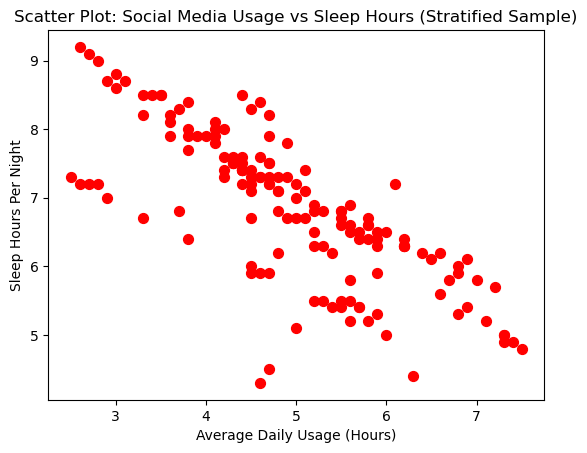

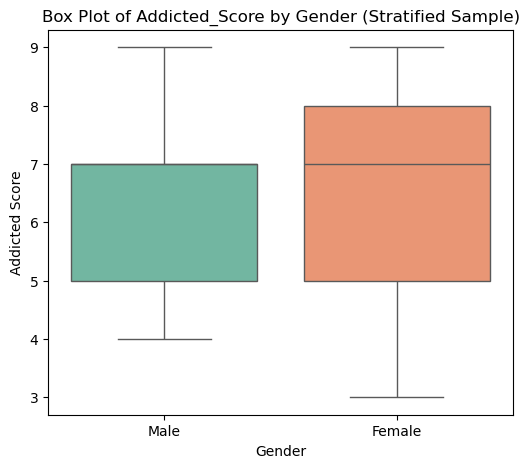

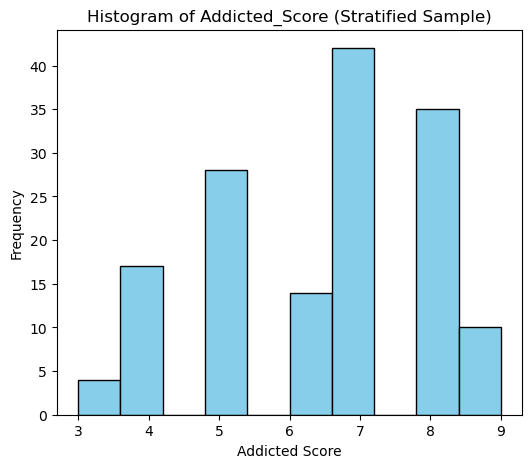

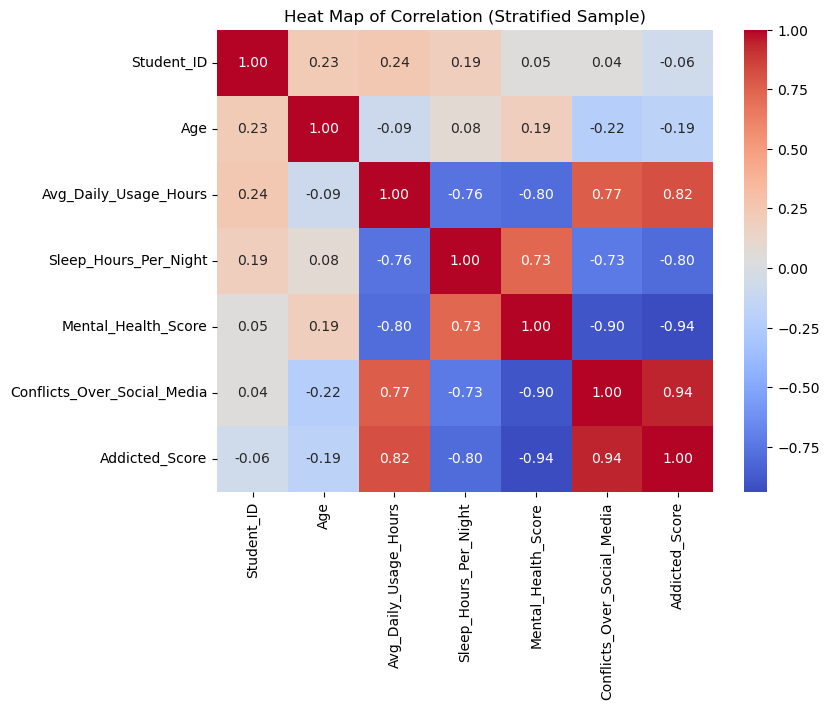

In [12]:
#Q6
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load the dataset ---
df = pd.read_csv('Students Social Media Addiction.csv')


# --- A.Scatter Plot using the stratified sample ---
stratified_sample.plot.scatter(
    x='Avg_Daily_Usage_Hours', 
    y='Sleep_Hours_Per_Night', 
    s=50, 
    c='red'
)

plt.title("Scatter Plot: Social Media Usage vs Sleep Hours (Stratified Sample)")
plt.xlabel("Average Daily Usage (Hours)")
plt.ylabel("Sleep Hours Per Night")
plt.show()



# b. BOX PLOT
plt.figure(figsize=(6, 5))
sns.boxplot(
    data=stratified_sample,
    x='Gender',
    y='Addicted_Score',
    hue='Gender',
    palette='Set2',
    legend=False
)
plt.title("Box Plot of Addicted_Score by Gender (Stratified Sample)")
plt.xlabel("Gender")
plt.ylabel("Addicted Score")
plt.show()

# c. HISTOGRAM
plt.figure(figsize=(6, 5))
plt.hist(stratified_sample['Addicted_Score'], bins=10, color='skyblue', edgecolor='black')
plt.title("Histogram of Addicted_Score (Stratified Sample)")
plt.xlabel("Addicted Score")
plt.ylabel("Frequency")
plt.show()

# d. HEAT MAP
# Compute correlation matrix for numerical columns
corr = stratified_sample.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heat Map of Correlation (Stratified Sample)")
plt.show()    
    

In [13]:
#Q7
import pandas as pd
from scipy.stats import pearsonr

# Clean and select data
clean_data = stratified_sample[['Age', 'Addicted_Score']].dropna()
age = clean_data['Age']
addicted = clean_data['Addicted_Score']

# Perform Pearson correlation test
r_value, p_value = pearsonr(age, addicted)
degrees_of_freedom = len(age) - 2

# Display results
print(f"Pearson Correlation Coefficient (r): {r_value:.3f}")
print(f"P-value: {p_value:.3f}")
print(f"Degrees of Freedom: {degrees_of_freedom}")

# Interpret results
if p_value < 0.05:
    print("\nConclusion: Since the P-value is less than 0.05, we reject the null hypothesis H₀.")
    print("There is a statistically significant correlation between Age and Addicted_Score.")
else:
    print("\nConclusion: Since the P-value is greater than 0.05, we accept the null hypothesis H₀.")
    print("There is no statistically significant correlation between Age and Addicted_Score.")


Pearson Correlation Coefficient (r): -0.185
P-value: 0.023
Degrees of Freedom: 148

Conclusion: Since the P-value is less than 0.05, we reject the null hypothesis H₀.
There is a statistically significant correlation between Age and Addicted_Score.


In [22]:
#Q8
import pandas as pd
from scipy.stats import ttest_1samp

# Population mean (from full dataset)
population_mean = df['Addicted_Score'].mean()

# Sample data (from stratified sample)
sample_data = stratified_sample['Addicted_Score'].dropna()

# Perform one-sample t-test
t_statistic, p_value = ttest_1samp(sample_data, population_mean)
degrees_of_freedom = len(sample_data) - 1

# Display results
print(f"Population Mean: {population_mean:.3f}")
print(f"Sample Mean: {sample_data.mean():.3f}")
print(f"T-Statistic: {t_statistic:.3f}")
print(f"P-value: {p_value:.3f}")
print(f"Degrees of Freedom: {degrees_of_freedom}")

# Interpret results
if p_value < 0.05:
    print("\nConclusion: Since the P-value is less than 0.05, we reject the null hypothesis H₀.")
    print("The stratified sample mean of Addicted_Score is significantly different from the population mean.")
else:
    print("\nConclusion: Since the P-value is greater than 0.05, we accept the null hypothesis H₀.")
    print("The stratified sample mean of Addicted_Score is not significantly different from the population mean,")
    print("indicating that the sample is representative of the normal population.")


Population Mean: 6.437
Sample Mean: 6.453
T-Statistic: 0.127
P-value: 0.899
Degrees of Freedom: 149

Conclusion: Since the P-value is greater than 0.05, we accept the null hypothesis H₀.
The stratified sample mean of Addicted_Score is not significantly different from the population mean,
indicating that the sample is representative of the normal population.


[[4]
 [7]
 [5]
 [7]
 [7]
 [7]
 [7]
 [6]
 [7]
 [6]
 [8]
 [6]
 [4]
 [5]
 [7]
 [7]
 [6]
 [6]
 [4]
 [4]
 [4]
 [5]
 [5]
 [7]
 [6]
 [8]
 [4]
 [7]
 [7]
 [7]
 [5]
 [7]
 [8]
 [8]
 [7]
 [7]
 [7]
 [8]
 [5]
 [7]
 [7]
 [4]
 [7]
 [8]
 [8]
 [5]
 [7]
 [5]
 [7]
 [6]
 [8]
 [5]
 [8]
 [4]
 [6]
 [7]
 [8]
 [7]
 [8]
 [8]
 [5]
 [7]
 [7]
 [9]
 [7]
 [7]
 [6]
 [4]
 [8]
 [7]
 [5]
 [5]
 [8]
 [8]
 [8]
 [6]
 [9]
 [7]
 [6]
 [9]
 [7]
 [8]
 [3]
 [8]
 [8]
 [4]
 [5]
 [8]
 [5]
 [4]
 [7]
 [7]
 [5]
 [9]
 [7]
 [8]
 [4]
 [5]
 [5]
 [8]
 [4]
 [7]
 [4]
 [8]
 [7]
 [8]
 [8]
 [8]
 [9]
 [8]
 [3]
 [8]
 [5]
 [7]
 [8]
 [7]
 [5]
 [8]
 [8]
 [7]
 [5]
 [3]
 [8]
 [3]
 [9]
 [5]
 [8]
 [4]
 [9]
 [5]
 [5]
 [9]
 [7]
 [5]
 [5]
 [7]
 [9]
 [4]
 [6]
 [9]
 [5]
 [7]
 [5]
 [8]
 [4]
 [6]
 [6]
 [5]
 [7]
 [8]]
[[3.6]
 [5.1]
 [4.5]
 [5.5]
 [5.5]
 [4.7]
 [4.7]
 [3.8]
 [5.6]
 [4.9]
 [5. ]
 [4.6]
 [3.8]
 [3.3]
 [5.9]
 [4.6]
 [4.1]
 [4.7]
 [2.5]
 [3.6]
 [3.3]
 [3.7]
 [3.7]
 [5.7]
 [4.7]
 [4.5]
 [3.3]
 [4.8]
 [5.3]
 [5.3]
 [4.8]
 [7.3]
 [4.7]
 [4.9]
 [5.7]
 [5.

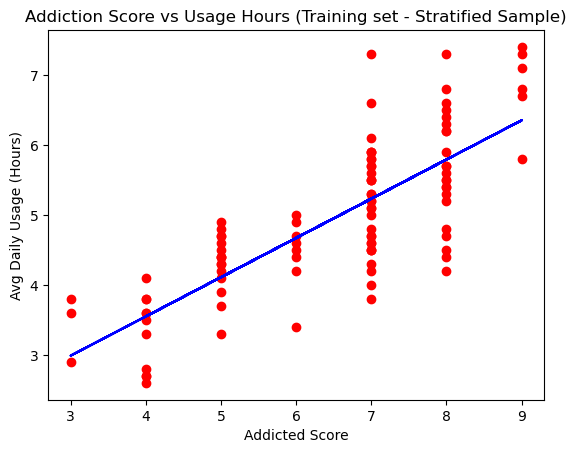

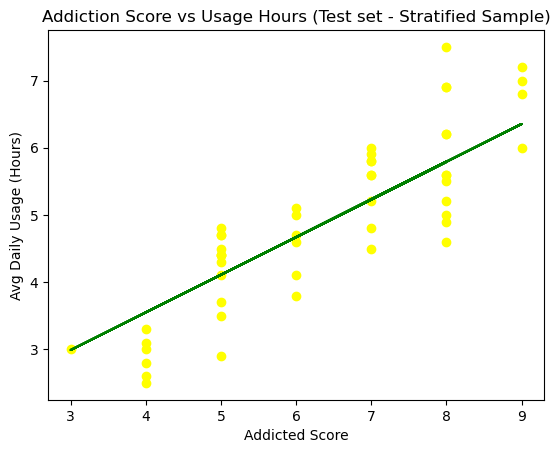

[[0.56]]
[1.31]


In [23]:
#Delverible 3:
#Linear regression:
# a. Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# b. Importing the stratified sample dataset
X = stratified_sample[['Addicted_Score']].values   # Independent variable
y = stratified_sample[['Avg_Daily_Usage_Hours']].values   # Dependent variable
print(X)
print(y)

# c. Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

# d. Training the Simple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# e. Predicting the Test set results
y_pred = regressor.predict(X_test)
print(X_test)
print(y_pred)

# f. Predicting a Specific Value
# Example: Find Avg Usage Hours when Addicted_Score = 7
regressor.predict([[7]])

# g. Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Addiction Score vs Usage Hours (Training set - Stratified Sample)')
plt.xlabel('Addicted Score')
plt.ylabel('Avg Daily Usage (Hours)')
plt.show()

# h. Visualising the Test set results
plt.scatter(X_test, y_test, color = 'yellow')
plt.plot(X_train, regressor.predict(X_train), color = 'green')
plt.title('Addiction Score vs Usage Hours (Test set - Stratified Sample)')
plt.xlabel('Addicted Score')
plt.ylabel('Avg Daily Usage (Hours)')
plt.show()

# i. Getting the final linear regression equation
print(regressor.coef_)
print(regressor.intercept_)


In [24]:
#Multilinear regression:
# a. Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# b. Importing the stratified sample dataset
data = stratified_sample.copy()

# Encode Gender (convert text to numeric: Female=0, Male=1)
data = pd.get_dummies(data, columns=['Gender'], drop_first=True)

# Independent variables (X)
X = data[['Age',
          'Avg_Daily_Usage_Hours',
          'Sleep_Hours_Per_Night',
          'Mental_Health_Score',
          'Conflicts_Over_Social_Media',
          'Gender_Male']].values

# Dependent variable (y)
y = data['Addicted_Score'].values

print(X)
print(y)

# c. Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 0)

# d. Training the Multiple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# e. Predicting the Test set results
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate(
    (y_pred.reshape(len(y_pred),1),
     y_test.reshape(len(y_test),1)), 1))

# f. Predicting the Specific Value
# Example: Predict Addicted_Score for a student
# Age=18, Usage=6, Sleep=6, Mental=6, Conflicts=3, Gender=Male(1)
regressor.predict([[18, 6, 6, 6, 3, 1]])

# g. Evaluating the Model Performance
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

# h. Getting the Final Multiple Linear Regression Equation
print("Coefficients:", regressor.coef_)
print("Intercept:", regressor.intercept_)


[[22 3.6 7.9 8 1 True]
 [21 5.1 7.1 6 3 True]
 [20 4.5 7.3 7 2 True]
 [21 5.5 6.8 6 3 True]
 [21 5.5 6.7 6 3 True]
 [21 4.7 7.5 6 3 True]
 [20 4.7 5.9 6 3 True]
 [21 3.8 6.4 7 2 True]
 [22 5.6 6.6 6 3 True]
 [21 4.9 7.8 7 2 True]
 [21 5.0 5.1 6 4 True]
 [22 4.6 8.4 7 2 True]
 [22 3.8 7.7 8 1 True]
 [22 3.3 6.7 7 2 True]
 [21 5.9 6.3 6 3 True]
 [20 4.6 5.9 6 3 True]
 [22 4.1 8.1 7 3 True]
 [21 4.7 8.2 7 2 True]
 [23 2.5 7.3 8 1 True]
 [21 3.6 8.2 8 2 True]
 [22 3.3 8.2 8 1 True]
 [21 3.7 6.8 7 2 True]
 [22 3.7 8.3 7 2 True]
 [21 5.7 6.4 6 3 True]
 [22 4.7 7.5 7 3 True]
 [19 4.5 7.1 5 4 True]
 [22 3.3 8.5 8 2 True]
 [19 4.8 6.2 5 3 True]
 [21 5.3 6.3 6 3 True]
 [21 5.3 6.8 5 3 True]
 [24 4.8 7.1 7 2 True]
 [21 7.3 4.9 6 3 True]
 [22 4.7 4.5 6 4 True]
 [19 4.9 6.7 5 4 True]
 [21 5.7 6.5 6 3 True]
 [22 5.8 6.4 6 3 True]
 [21 4.5 6.0 6 2 True]
 [21 7.5 4.8 5 4 True]
 [19 4.7 7.2 7 2 True]
 [20 5.2 6.3 6 3 True]
 [21 5.2 6.9 5 3 True]
 [21 3.8 8.0 8 2 True]
 [22 3.8 8.4 6 3 True]
 [21 6.9 5.

In [25]:
#Logistic regression:
# a. Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# b. Using the stratified sample as dataset
dataset = stratified_sample.copy()

# Create binary dependent variable from Addicted_Score
# 1 = High addiction (score >= 7), 0 = Low/Moderate (score < 7)
dataset['High_Addiction'] = (dataset['Addicted_Score'] >= 7).astype(int)

# Encode Gender (Male/Female) to numeric
dataset = pd.get_dummies(dataset, columns=['Gender'], drop_first=True)
# Now we have 'Gender_Male' column (1 = Male, 0 = Female)

# Independent variables (X)
X = dataset[['Age',
             'Avg_Daily_Usage_Hours',
             'Sleep_Hours_Per_Night',
             'Mental_Health_Score',
             'Conflicts_Over_Social_Media',
             'Gender_Male']].values

# Dependent variable (y)
y = dataset['High_Addiction'].values

print(X)
print(y)

# d. Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 0)

# e. Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# f. Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# g. Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy:", accuracy_score(y_test, y_pred))

# h. Predicting the value for a new student from stratified-style data
# Example: Age=18, Usage=6, Sleep=6, Mental=5, Conflicts=3, Male=1
print(classifier.predict(
    sc.transform([[18, 6, 6, 5, 3, 1]])
))
# 1 = High addiction, 0 = Low/Moderate


[[22 3.6 7.9 8 1 True]
 [21 5.1 7.1 6 3 True]
 [20 4.5 7.3 7 2 True]
 [21 5.5 6.8 6 3 True]
 [21 5.5 6.7 6 3 True]
 [21 4.7 7.5 6 3 True]
 [20 4.7 5.9 6 3 True]
 [21 3.8 6.4 7 2 True]
 [22 5.6 6.6 6 3 True]
 [21 4.9 7.8 7 2 True]
 [21 5.0 5.1 6 4 True]
 [22 4.6 8.4 7 2 True]
 [22 3.8 7.7 8 1 True]
 [22 3.3 6.7 7 2 True]
 [21 5.9 6.3 6 3 True]
 [20 4.6 5.9 6 3 True]
 [22 4.1 8.1 7 3 True]
 [21 4.7 8.2 7 2 True]
 [23 2.5 7.3 8 1 True]
 [21 3.6 8.2 8 2 True]
 [22 3.3 8.2 8 1 True]
 [21 3.7 6.8 7 2 True]
 [22 3.7 8.3 7 2 True]
 [21 5.7 6.4 6 3 True]
 [22 4.7 7.5 7 3 True]
 [19 4.5 7.1 5 4 True]
 [22 3.3 8.5 8 2 True]
 [19 4.8 6.2 5 3 True]
 [21 5.3 6.3 6 3 True]
 [21 5.3 6.8 5 3 True]
 [24 4.8 7.1 7 2 True]
 [21 7.3 4.9 6 3 True]
 [22 4.7 4.5 6 4 True]
 [19 4.9 6.7 5 4 True]
 [21 5.7 6.5 6 3 True]
 [22 5.8 6.4 6 3 True]
 [21 4.5 6.0 6 2 True]
 [21 7.5 4.8 5 4 True]
 [19 4.7 7.2 7 2 True]
 [20 5.2 6.3 6 3 True]
 [21 5.2 6.9 5 3 True]
 [21 3.8 8.0 8 2 True]
 [22 3.8 8.4 6 3 True]
 [21 6.9 5.

In [17]:
# Q11 - Classification using KNN, Naive Bayes, and Decision Tree

# a. Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# b. Importing the stratified sample dataset (already created earlier in the notebook)
data = stratified_sample.copy()

# Create binary dependent variable from Addicted_Score
# 1 = High addiction (score >= 7), 0 = Low/Moderate (score < 7)
data["High_Addiction"] = (data["Addicted_Score"] >= 7).astype(int)

# Encode Gender (convert text to numeric: Female=0, Male=1)
data = pd.get_dummies(data, columns=['Gender'], drop_first=True)

# Independent variables (X)
X = data[['Age',
          'Avg_Daily_Usage_Hours',
          'Sleep_Hours_Per_Night',
          'Mental_Health_Score',
          'Conflicts_Over_Social_Media',
          'Gender_Male']].values

# Dependent variable (y) → classification target
y = data['High_Addiction'].values

print("X shape:", X.shape)
print("y shape:", y.shape)

# c. Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 0)

# d. Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# ====== KNN MODEL ======
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

cm_knn = confusion_matrix(y_test, y_pred_knn)
acc_knn = accuracy_score(y_test, y_pred_knn)

print("\nKNN Confusion Matrix:")
print(cm_knn)
print("KNN Accuracy: {:.2f}%".format(acc_knn * 100))

# ====== NAIVE BAYES MODEL ======
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

cm_nb = confusion_matrix(y_test, y_pred_nb)
acc_nb = accuracy_score(y_test, y_pred_nb)

print("\nNaive Bayes Confusion Matrix:")
print(cm_nb)
print("Naive Bayes Accuracy: {:.2f}%".format(acc_nb * 100))

# ====== DECISION TREE MODEL ======
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

cm_dt = confusion_matrix(y_test, y_pred_dt)
acc_dt = accuracy_score(y_test, y_pred_dt)

print("\nDecision Tree Confusion Matrix:")
print(cm_dt)
print("Decision Tree Accuracy: {:.2f}%".format(acc_dt * 100))


# ================== Q12: MODEL EVALUATION ==================

print("\n\n===== Q12: MODEL EVALUATION =====")

# Compare all model accuracies
model_accuracies = {
    "KNN": accuracy_score(y_test, y_pred_knn),
    "Naive Bayes": accuracy_score(y_test, y_pred_nb),
    "Decision Tree": accuracy_score(y_test, y_pred_dt)
}


# Identify the best model
best_model = max(model_accuracies, key=model_accuracies.get)

print("BEST MODEL:", best_model)
print("BEST ACCURACY: {:.2f}%".format(model_accuracies[best_model] * 100))


# Q13 – Predict the dependent variable using the best-fit classifier (Decision Tree)

print("\n\n===== Q13: Predict the dependent variable =====")


# Using the already trained Decision Tree model (dt)

y_pred_best = dt.predict(X_test)

print("Predicted High_Addiction values:")
print(y_pred_best)

print("\nActual High_Addiction values:")
print(y_test)

# Optional: Compare predictions vs actual
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_best})
print("\nComparison:")
print(comparison)




X shape: (150, 6)
y shape: (150,)

KNN Confusion Matrix:
[[ 6  1]
 [ 0 23]]
KNN Accuracy: 96.67%

Naive Bayes Confusion Matrix:
[[ 6  1]
 [ 0 23]]
Naive Bayes Accuracy: 96.67%

Decision Tree Confusion Matrix:
[[ 7  0]
 [ 0 23]]
Decision Tree Accuracy: 100.00%


===== Q12: MODEL EVALUATION =====
BEST MODEL: Decision Tree
BEST ACCURACY: 100.00%


===== Q13: Predict the dependent variable =====
Predicted High_Addiction values:
[1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0]

Actual High_Addiction values:
[1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0]

Comparison:
    Actual  Predicted
0        1          1
1        0          0
2        1          1
3        1          1
4        1          1
5        1          1
6        0          0
7        1          1
8        1          1
9        1          1
10       1          1
11       1          1
12       1          1
13       1          1
14       1          1
15       1          1
16       1          1
17      

C:\Users\jawhr\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K-Means Cluster Labels:
[1 1 2 0 1 1 1 2 0 2 1 1 1 0 1 2 2 1 0 0 0 1 2 1 1 0 0 0 1 1 2 0 0 2 0 0 0
 1 0 0 0 1 0 0 2 1 0 1 1 1 1 1 0 1 1 0 1 0 0 2 1 0 0 2 1 0 0 1 0 0 1 1 1 1
 2 0 1 0 2 1 0 1 0 0 0 0 2 2 2 0 0 0 2 1 0 1 0 2 2 1 2 0 1 1 1 0 1 2 0 2 2
 0 1 2 2 0 2 1 2 2 0 1 1 1 0 2 1 0 1 0 2 1 1 0 1 0 2 0 1 0 2 1 0 0 2 0 1 0
 2 0]

Hierarchical Cluster Labels:
[0 0 2 1 0 0 0 0 1 0 0 0 0 1 0 2 2 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 2 1 1 1
 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 2 0 1 1 0 1 1 0 0 0 0
 2 1 0 0 2 0 1 0 1 1 1 1 2 2 2 1 1 1 2 0 1 0 1 2 2 0 2 1 0 0 0 1 0 0 1 2 2
 1 0 2 2 0 0 0 2 2 1 0 0 0 0 2 0 1 0 1 2 0 0 1 0 1 2 1 0 1 2 0 1 1 2 1 0 1
 2 0]


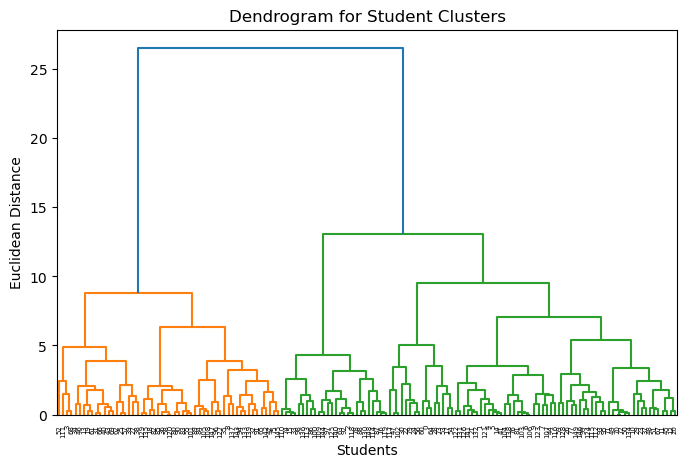

In [19]:
# Q14 – Cluster Analysis (K-Means + Hierarchical Clustering) 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch

# Use stratified sample
data = stratified_sample.copy()

# Select numeric features for clustering
cluster_data = data[['Age',
                     'Avg_Daily_Usage_Hours',
                     'Sleep_Hours_Per_Night',
                     'Mental_Health_Score',
                     'Conflicts_Over_Social_Media']]

# Scale the data
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_data)

# ------------------ K-MEANS CLUSTERING ------------------
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_labels = kmeans.fit_predict(cluster_scaled)

print("K-Means Cluster Labels:")
print(kmeans_labels)

# ------------------ HIERARCHICAL CLUSTERING  ------------------
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
hc_labels = hc.fit_predict(cluster_scaled)

print("\nHierarchical Cluster Labels:")
print(hc_labels)

# ------------------ DENDROGRAM ------------------
plt.figure(figsize=(8, 5))
plt.title("Dendrogram for Student Clusters")
dendrogram = sch.dendrogram(sch.linkage(cluster_scaled, method='ward'))
plt.xlabel("Students")
plt.ylabel("Euclidean Distance")
plt.show()
